In [8]:
import pandas as pd
import numpy as np
import os
from typing import List
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
# Set the style of seaborn
sns.set_theme(style="whitegrid")
# Set the default figure size
plt.rcParams["figure.figsize"] = (10, 6)
# Set the default font size
plt.rcParams["font.size"] = 12
# Set the default color palette
sns.set_palette("deep")
# Ensure no dataframe output is truncated
pd.set_option("display.max_columns", 1)
# Ensure no column is truncated
pd.set_option("display.max_colwidth", 1)


# Utils for data processing
# TODO: Load files from a given path and append all of them into a single dataframe
def load_files(path):
    all_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".csv"):
                all_files.append(os.path.join(root, file))
    return all_files


def get_data(path: List[str] | str) -> pd.DataFrame:
    """Loads all data files in a directory or a single file into a pandas DataFrame.
    Args:
        path (str or list of str): Path to the directory or a single file.
    Returns:
        pd.DataFrame: DataFrame containing all data. (If list was passed, it will be concatenated)
    """
    unified_df = []
    if isinstance(path, str):
        if os.path.isdir(path):
            all_files = load_files(path)
            for file in all_files:
                df = pd.read_csv(file)
                unified_df.append(df)
        else:
            df = pd.read_csv(path)
    elif isinstance(path, list):
        for file in path:
            df = pd.read_csv(file)
            unified_df.append(df)
    else:
        raise ValueError("Path must be a string or a list of strings.")
    if len(unified_df) > 0:
        df = pd.concat(unified_df, ignore_index=True)
    else:
        df = pd.DataFrame()
    # Remove duplicate rows
    df = df.drop_duplicates()
    # Remove rows with all NaN values
    df = df.dropna(how='all')
    return df

# Show the first few rows of the dataframe
def show_data(df):
    print("Displaying a few facts about the dataframe: \n", "="*50)
    print("First few rows of the dataframe:")
    print("-"*50)
    display(df.head())
    print("Data types:")
    print("-"*50)
    display(df.dtypes)
    print("Dataset description and statistics: ")
    print("-"*50)
    display(df.describe())
    print("Missing values:")
    print("-"*50)
    display(df.isnull().sum())
    print("Shape of the dataframe:")
    print("-"*50)
    print(df.shape)
    print("Columns:")
    print("-"*50)
    print(df.columns)

# Paths to the datasets
DATA_DIR = "../data"

INDICES = os.path.join(DATA_DIR, "train/indices")
for root, dirs, files in os.walk(INDICES):
    for file in files:
        print(os.path.join(root, file))

../data/train/indices/Dow_Jones.csv
../data/train/indices/NASDAQ.csv
../data/train/indices/SP500.csv


In [2]:
all_files = load_files(INDICES)
print(f"Found {len(all_files)} files in {INDICES}")

Found 3 files in ../data/train/indices


In [3]:
# Load the data
df = get_data(INDICES)
show_data(df)

Displaying a few facts about the dataframe: 
First few rows of the dataframe:
--------------------------------------------------


,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2015-01-02,DJI,17823.070312,17951.779297,17731.300781,17832.990234,17832.990234,NaN,76270000
1,2015-01-05,DJI,17821.300781,17821.300781,17475.929688,17501.650391,17501.650391,-0.018580,116160000
2,2015-01-06,DJI,17504.179688,17581.050781,17262.369141,17371.640625,17371.640625,-0.007428,101870000
3,2015-01-07,DJI,17374.779297,17597.080078,17374.779297,17584.519531,17584.519531,0.012254,91030000
4,2015-01-08,DJI,17591.970703,17916.039062,17591.970703,17907.869141,17907.869141,0.018388,114890000


Data types:
--------------------------------------------------


Date         object
Ticker       object
Open        float64
High        float64
Low         float64
Close       float64
Adjusted    float64
Returns     float64
Volume        int64
dtype: object

Dataset description and statistics: 
--------------------------------------------------


,Open,High,Low,Close,Adjusted,Returns,Volume
count,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7707.000000,7.710000e+03
mean,13825.728926,13904.175032,13741.407036,13827.360187,13827.360187,0.000486,2.641389e+09
std,11564.268047,11624.433285,11500.866034,11565.526204,11565.526204,0.011944,2.047000e+09
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,-0.129265,4.035000e+07
25%,4269.674927,4296.802368,4233.364868,4274.157471,4274.157471,-0.004216,3.701700e+08
50%,8697.959961,8761.720215,8632.089844,8707.944824,8707.944824,0.000753,2.699295e+09
75%,21460.980469,21533.519531,21387.812500,21444.541992,21444.541992,0.006201,4.148812e+09
max,45054.359375,45073.628906,44799.738281,45014.039062,45014.039062,0.113650,1.337113e+10


Missing values:
--------------------------------------------------


Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     3
Volume      0
dtype: int64

Shape of the dataframe:
--------------------------------------------------
(7710, 9)
Columns:
--------------------------------------------------
Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adjusted', 'Returns',
       'Volume'],
      dtype='object')


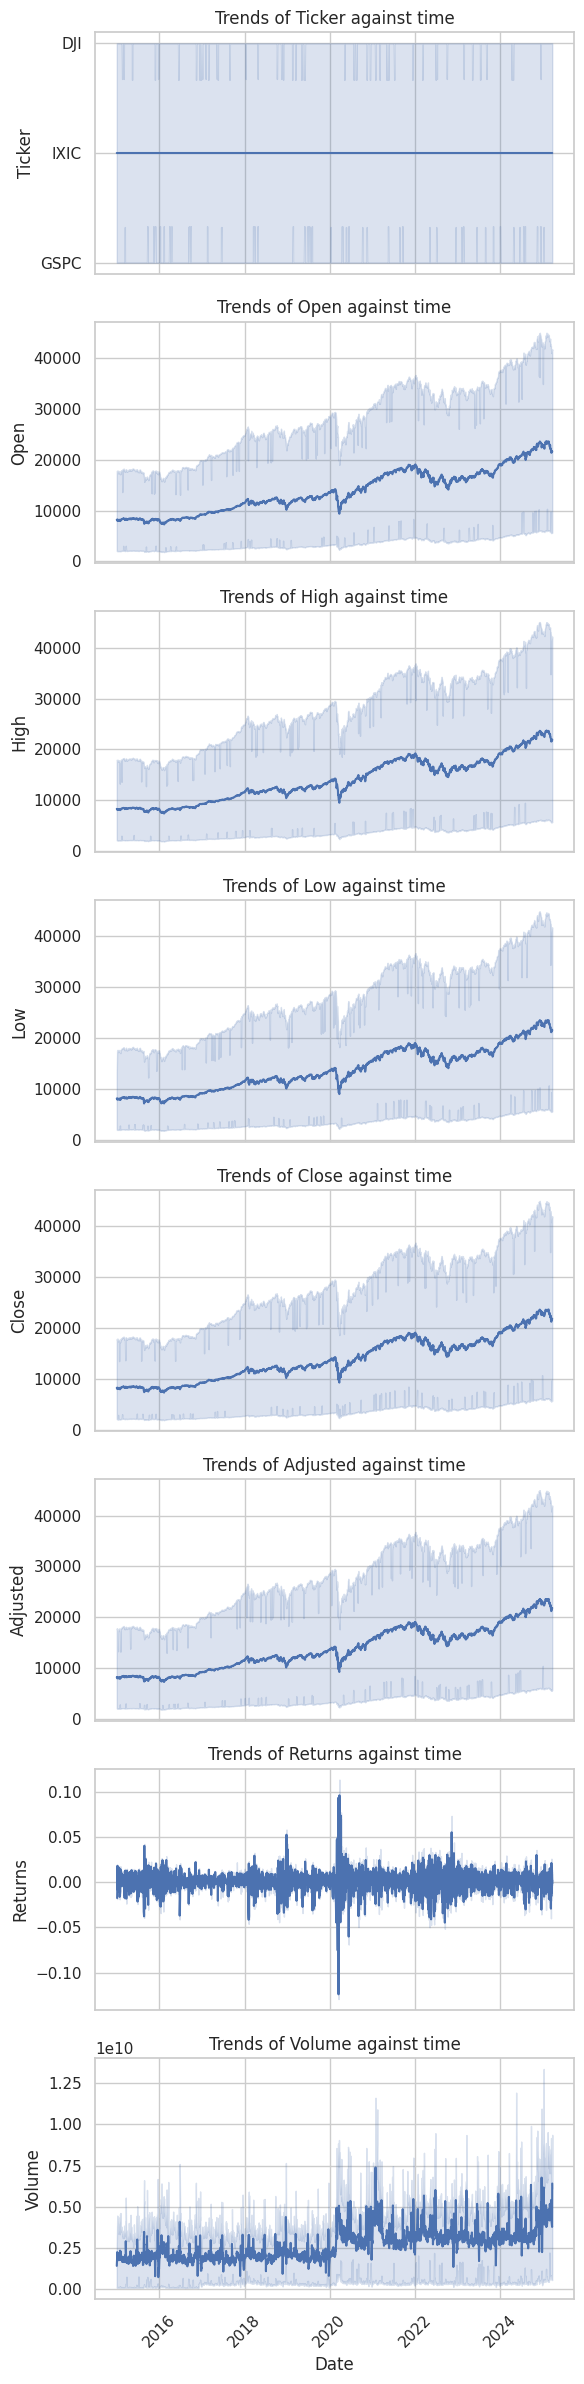

In [4]:
# Refined function to visualize trends against time for each of the columns
def plot_trends(df: pd.DataFrame, columns: List[str]):
    """Plots the trends of multiple columns against time in subplots.
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        columns (List[str]): List of column names to plot.
    """
    num_columns = len(columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(6, 3 * num_columns), sharex=True)
    
    if num_columns == 1:
        axes = [axes]  # Ensure axes is iterable for a single column
    
    for ax, column in zip(axes, columns):
        sns.lineplot(data=df, x='Date', y=column, ax=ax)
        ax.set_title(f'Trends of {column} against time')
        ax.set_xlabel('Date')
        ax.set_ylabel(column)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
# Plot trends for all columns
columns_to_plot = [col for col in df.columns if col != 'Date']  # Exclude 'Date' column
plot_trends(df.reset_index(), columns_to_plot)

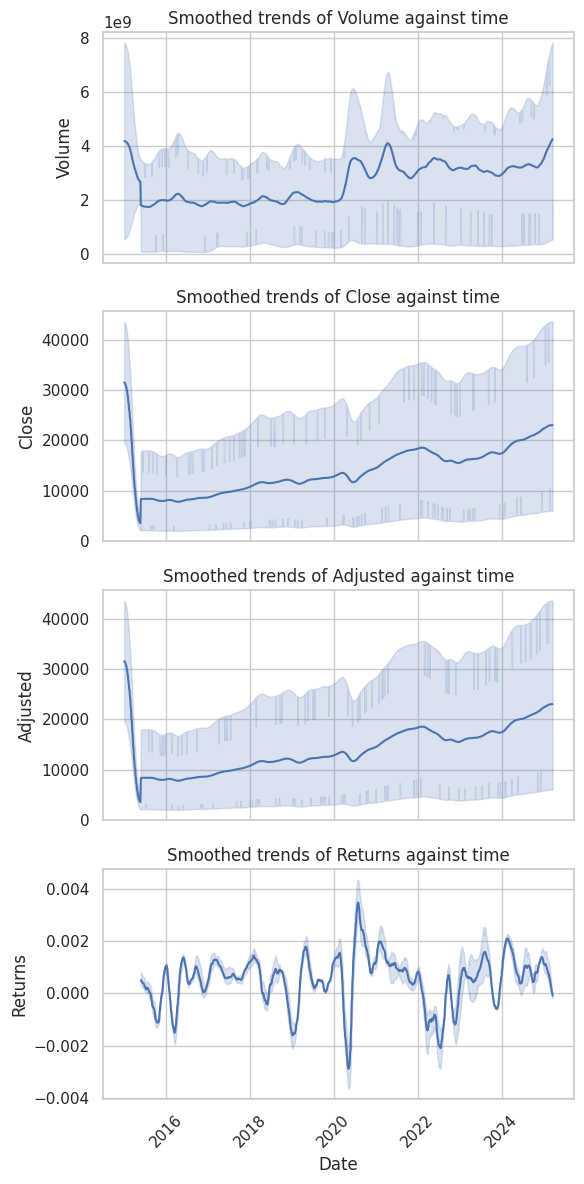

In [5]:
# TODO: Smooth the trend for Volume, close, adjusted and returns to see the trend better
WINDOW = 50
def smooth_trend(df: pd.DataFrame, column: str, window: int) -> pd.Series:
    """Smooths the trend of a given column using a rolling mean.
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        column (str): Column name to smooth.
        window (int): Window size for the rolling mean.
    Returns:
        pd.Series: Smoothed series.
    """
    return df[f"{column}"].rolling(window=window).mean()

# Plot smoothed trends for Volume, Close, Adjusted and Returns
def plot_smoothed_trends(df: pd.DataFrame, columns: List[str], window: int):
    """Plots the smoothed trends of multiple columns against time in subplots.
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        columns (List[str]): List of column names to plot.
        window (int): Window size for the rolling mean.
    """
    num_columns = len(columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(6, 3 * num_columns), sharex=True)
    
    if num_columns == 1:
        axes = [axes]  # Ensure axes is iterable for a single column
    
    for ax, column in zip(axes, columns):
        smoothed_series = smooth_trend(df, column, window)
        sns.lineplot(data=df, x='Date', y=smoothed_series, ax=ax)
        ax.set_title(f'Smoothed trends of {column} against time')
        ax.set_xlabel('Date')
        ax.set_ylabel(column)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

columns_plot = ['Volume', 'Close', 'Adjusted', 'Returns']
for column in columns_plot:
    df[f"{column}"] = smooth_trend(df, column, WINDOW)

plot_smoothed_trends(df.reset_index(), columns_plot, WINDOW)

In [6]:
df["Ticker"].nunique()

3